In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
import graphviz




In [ ]:
df = pd.read_csv('/content/2. drug200 (1).csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
maping = {'HIGH': 2, 'LOW': 0, 'NORMAL': 1}
df['BP'] = df['BP'].map(maping)

maping = {'M': 1, 'F': 0}
df['Sex'] = df['Sex'].map(maping)

maping = {'HIGH': 1, 'NORMAL': 0}
df['Cholesterol'] = df['Cholesterol'].map(maping)

In [ ]:

x = df[['Age', 'Sex', 'BP', 'Cholesterol','Na_to_K']]
y = df['Drug']


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.25, random_state=1)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y1_pred = rf.predict(x1_test)


In [ ]:
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y1_test, y1_pred)*100))



Accuracy: 96.0000


In [ ]:
print('Confusion Matrix:\n',confusion_matrix(y1_test, y1_pred))

Confusion Matrix:
 [[21  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 16]]


**Dicision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x2_train=x_train
y2_train = y_train

In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [ ]:
y2_pred  = Tree.predict(x_test)

In [ ]:
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y2_pred)*100))


Accuracy: 100.0000


In [ ]:
predictions = Tree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[ 4  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 21]]


**Multinomial Logistic regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
multilogreg = LogisticRegression(multi_class='multinomial')
multilogreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
predictions = multilogreg.predict(x_test)

In [ ]:
print('Accuracy Score:',accuracy_score(y_test, predictions)*100)

Accuracy Score: 88.0


**Mannual Testing**

In [ ]:
mt1 = [[40,1,1,0,20]]
multilogreg.predict(mt1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [ ]:
mt2 = [[20,1,0,1,25]]
Tree.predict(mt2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

**Classification Report**

In [ ]:
#Random Forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
#Dcesion Tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
#Logistic Regression
print('Classification Report:\n',classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

       drugA       0.80      1.00      0.89         4
       drugB       1.00      1.00      1.00         5
       drugC       0.67      0.50      0.57         4
       drugX       0.87      0.81      0.84        16
       drugY       0.91      0.95      0.93        21

    accuracy                           0.88        50
   macro avg       0.85      0.85      0.85        50
weighted avg       0.88      0.88      0.88        50



**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import svm

In [ ]:
svm_ml = svm.SVC(kernel='linear').fit(x_train, y_train)

In [ ]:
cv_svm = cross_validate(svm_ml, x, y, cv=10)
print(cv_svm['test_score'])
print(cv_svm['test_score'].mean())

[1.   1.   1.   1.   1.   1.   1.   0.95 0.95 1.  ]
0.99


In [ ]:
score_df_svm=pd.DataFrame(cv_svm)
score_df_svm

,fit_time,score_time,test_score
0,0.006798,0.002001,1.00
1,0.004689,0.001806,1.00
2,0.012505,0.005718,1.00
3,0.009384,0.001963,1.00
4,0.004005,0.001765,1.00
5,0.004932,0.001818,1.00
6,0.008007,0.001832,1.00
7,0.004874,0.001773,0.95
8,0.006322,0.001896,0.95
9,0.006741,0.001814,1.00


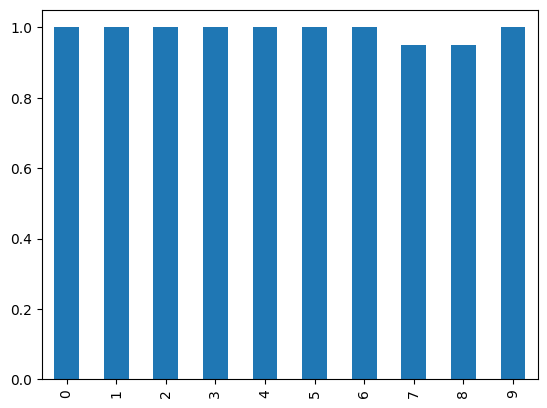

In [ ]:
bar_chart = score_df_svm.test_score.plot.bar()